# UK E-Commerce Data

RFM 분석을 바탕으로 멤버십 등급 정의하는 것을 목표로함

## 1. 데이터 전처리
## 2. RFM 분석
## 3. K-Means Clustering

--- Requirement

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data.csv', encoding='ISO-8859-1', dtype={'CustomerID' : str})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### 중복값 제거

In [4]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### 결측치 제거

In [5]:
df.dropna(subset=['CustomerID','Description'], inplace=True)

### 필요없는 StockCode행 삭제

In [6]:
drop_sc_list = ['POST','DOT','D','CRUK','C2','BANK CHARGES']
drop_sc_idx = df[df['StockCode'].isin(drop_sc_list)].index
print('Before drop:',len(df))
df.drop(drop_sc_idx, inplace=True)
print('After drop:',len(df))

Before drop: 401604
After drop: 400153


### StockCode, Description 일치

In [7]:
# 중복되는 행들
duplicated_rows = df[df.duplicated('StockCode', keep=False)]

# 중복되는 첫 번째 행의 값을 가져옴
first_duplicated_values = duplicated_rows.drop_duplicates('StockCode').set_index('StockCode')

# 중복되는 행들의 인덱스를 가져옴
duplicated_indices = duplicated_rows.index

# 중복되는 행들의 '특정 컬럼'을 첫 번째 중복 행의 값으로 채움
df.loc[duplicated_indices, 'Description'] = df.loc[duplicated_indices, 'StockCode'].map(first_duplicated_values['Description'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Total Bills 컬럼 생성

In [8]:
df['Total_bills'] = df['Quantity'] * df['UnitPrice']
drop_idx = df[df['Total_bills']==0].index
df.drop(drop_idx, inplace=True)
df[df['Total_bills']<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
127,536381,22261,FELT EGG COSY WHITE RABBIT,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
128,536381,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
...,...,...,...,...,...,...,...,...,...
536572,581580,21803,CHRISTMAS TREE STAR DECORATION,2,2011-12-09 12:20:00,0.42,12748,United Kingdom,0.84
536573,581580,21809,CHRISTMAS HANGING TREE WITH BELL,2,2011-12-09 12:20:00,0.39,12748,United Kingdom,0.78
536574,581580,20974,12 PENCILS SMALL TUBE SKULL,1,2011-12-09 12:20:00,0.65,12748,United Kingdom,0.65
536578,581580,22695,WICKER WREATH SMALL,1,2011-12-09 12:20:00,0.59,12748,United Kingdom,0.59


### Transaction_status컬럼 생성

In [9]:
total_transactions = df.groupby(['CustomerID'])['InvoiceNo'].nunique().reset_index()
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,Completed
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Completed
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Completed
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Completed
536640,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,Completed


### Invoice Month 컬럼 생성

In [10]:
df.insert(5, 'InvoiceMonth', df['InvoiceDate'].dt.strftime('%Y-%m'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12,2.55,17850,United Kingdom,15.30,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12,2.75,17850,United Kingdom,22.00,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed


### 상반기 고객별 구매 데이터 정리

In [11]:
df['InvoiceMonth'] = pd.to_datetime(df['InvoiceMonth'], format='%Y-%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400113 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           400113 non-null  object        
 1   StockCode           400113 non-null  object        
 2   Description         400113 non-null  object        
 3   Quantity            400113 non-null  int64         
 4   InvoiceDate         400113 non-null  datetime64[ns]
 5   InvoiceMonth        400113 non-null  datetime64[ns]
 6   UnitPrice           400113 non-null  float64       
 7   CustomerID          400113 non-null  object        
 8   Country             400113 non-null  object        
 9   Total_bills         400113 non-null  float64       
 10  Transaction_Status  400113 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 36.6+ MB


In [12]:
df_first = df[(df['InvoiceMonth'] >= '2011-01-01') & (df['InvoiceMonth'] < '2011-07-01')]
df_first.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status
41981,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,2011-01-01,1.95,13313,United Kingdom,19.5,Completed
41982,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,2011-01-01,0.42,13313,United Kingdom,10.5,Completed
41983,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,2011-01-01,0.42,13313,United Kingdom,10.5,Completed
41984,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2011-01-01,2.10,13313,United Kingdom,10.5,Completed
41985,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,2011-01-01,1.25,13313,United Kingdom,12.5,Completed


### Recency

In [33]:
df_first_info = df_first.groupby(['CustomerID'])['InvoiceDate'].max().reset_index()
# 데이터셋에서 가장 마지막 날짜
most_recent_date = df_first['InvoiceDate'].max()
df_first_info['Recent_Date'] = most_recent_date
# 구매자의 가장 최근 구매 날짜
df_first_info['Recency'] = (df_first_info['Recent_Date'] - df_first_info['InvoiceDate']).dt.days
df_first_info.drop(['Recent_Date', 'InvoiceDate'], axis=1, inplace=True)
df_first_info.reset_index()
df_first_info.head()

,CustomerID,Recency
0,12346,163
1,12347,21
2,12348,86
3,12350,148
4,12352,100


### Monetary/Frequency

In [34]:
# 총 구매액, 총수량, 총 구매횟수
df_first_info_M = df_first.groupby(['CustomerID']).agg({'Total_bills' : 'sum', 'InvoiceNo' : lambda x : x.nunique()}).reset_index()
# 컬럼 변경
df_first_info_M.columns=['CustomerID', 'Monetary', 'Frequency']
df_first_info_M.head()

,CustomerID,Monetary,Frequency
0,12346,0.00,2
1,12347,1494.16,3
2,12348,514.44,2
3,12350,294.40,1
4,12352,521.18,8


In [35]:
# customer_df와 병합
df_first_info = pd.merge(df_first_info, df_first_info_M, on='CustomerID', how='left')
df_first_info.head()

,CustomerID,Recency,Monetary,Frequency
0,12346,163,0.00,2
1,12347,21,1494.16,3
2,12348,86,514.44,2
3,12350,148,294.40,1
4,12352,100,521.18,8


### Length

In [36]:
length = df_first.groupby(['CustomerID'])[['InvoiceDate']].min()
most_recent_date = df_first.groupby(['CustomerID'])[['InvoiceDate']].max()

length_df = pd.merge(length, most_recent_date, on='CustomerID')

length_df['Length'] = (length_df['InvoiceDate_y'] - length_df['InvoiceDate_x']).dt.days
length_df.drop(['InvoiceDate_y', 'InvoiceDate_x'], axis=1, inplace=True)

df_first_info = pd.merge(df_first_info, length_df, on='CustomerID')
df_first_info.head()

,CustomerID,Recency,Monetary,Frequency,Length
0,12346,163,0.00,2,0
1,12347,21,1494.16,3,133
2,12348,86,514.44,2,70
3,12350,148,294.40,1,0
4,12352,100,521.18,8,34


In [37]:
# 휴면 고객 제외 - 1회 구매 이후 3개월 동안 구매가 일어나지 않은 고객
df_first_info = df_first_info[df_first_info['Monetary'] > 0]
sleeping = df_first_info[(df_first_info['Frequency'] == 1) & (df_first_info['Recency'] > 90)].index
active_customer = df_first_info.drop(sleeping, axis=0)
len(active_customer.index)

2199

In [38]:
df_first_info.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,2716.0,58.142121,47.840393,0.000000e+00,18.0000,44.00,92.0000,177.00
Monetary,2716.0,1158.727405,4118.720522,3.552714e-15,238.5125,478.48,1030.7625,126867.23
Frequency,2716.0,3.268409,4.766107,1.000000e+00,1.0000,2.00,4.0000,78.00
Length,2716.0,50.393594,57.860486,0.000000e+00,0.0000,20.00,102.0000,177.00


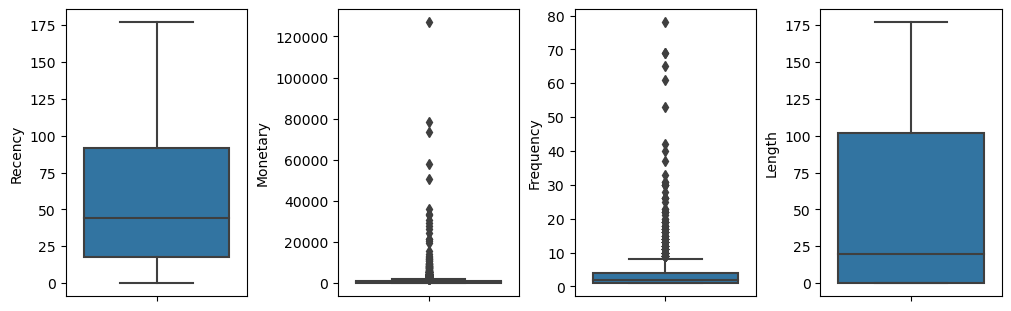

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
rfml_range = df_first_info.copy()
rfml_range = rfml_range.drop(['CustomerID'], axis=1)
fig, ax = plt.subplots(1, 4, figsize=(10, 3), constrained_layout = True)
for a, b in enumerate(list(rfml_range.columns)):
    sns.boxplot(y=rfml_range[b], ax=ax[a])
plt.show()

### RFM(1)

In [47]:
def assign_score(value, boundaries):
    if value <= boundaries[0]:
        return 5
    elif value <= boundaries[1]:
        return 4
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 2
    else:
        return 1

In [49]:
test_rfm = df_first_info
test_rfm.head()

,CustomerID,Recency,Monetary,Frequency
1,12347,21,1494.16,3
2,12348,86,514.44,2
3,12350,148,294.40,1
4,12352,100,521.18,8
5,12353,42,89.00,1


In [45]:
r_boundaries = np.percentile(test_rfm['Recency'], [20, 40, 60, 80])

In [46]:
r_boundaries

array([ 14.,  34.,  57., 102.])

### RFM 점수 할당 함수 생성

In [24]:
def assign_score(value, boundaries):
    if value <= boundaries[0]:
        return 1
    elif value <= boundaries[1]:
        return 2
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 4
    else:
        return 5


def assign_score_2(value, boundaries):
    if value <= boundaries[0]:
        return 4
    elif value <= boundaries[1]:
        return 3
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 2
    else:
        return 1


In [29]:
# Recency, Frequency, Monetary, Length 비율 분배
r_boundaries = np.percentile(df_first_info['Recency'], [2.5, 13.5, 34, 66, 86.5, 97.5])
f_boundaries = np.percentile(df_first_info['Frequency'], [2.5, 13.5, 34, 66, 86.5, 97.5])
m_boundaries = np.percentile(df_first_info['Monetary'], [2.5, 13.5, 34, 66, 86.5, 97.5])
l_boundaries = np.percentile(df_first_info['Length'], [2.5, 13.5, 34, 66, 86.5, 97.5])

#각 RFM 점수에 대해 점수 할당
df_first_info['R_Score'] = df_first_info['Recency'].apply(lambda x : assign_score_2(x, r_boundaries))
df_first_info['F_Score'] = df_first_info['Frequency'].apply(lambda x : assign_score(x, f_boundaries))
df_first_info['M_Score'] = df_first_info['Monetary'].apply(lambda x : assign_score(x, m_boundaries))
df_first_info['L_Score'] = df_first_info['Length'].apply(lambda x : assign_score(x, l_boundaries))

# RFM 스코어 계산
df_first_info['RFML_Score'] = df_first_info['R_Score'] + df_first_info['F_Score'] + df_first_info['M_Score'] + df_first_info['L_Score']
df_first_info.head()

,CustomerID,Recency,Monetary,Frequency,Length,R_Score,F_Score,M_Score,L_Score,RFML_Score
1,12347,21,1494.16,3,133,3,4,5,5,17
2,12348,86,514.44,2,70,1,4,4,4,13
3,12350,148,294.40,1,0,1,1,3,1,6
4,12352,100,521.18,8,34,1,5,4,4,14
5,12353,42,89.00,1,0,2,1,2,1,6


### 경계값 계산

In [30]:
import numpy as np
recency_values = df_first_info['Recency']
frequency_values = df_first_info['Frequency']
monetary_values = df_first_info['Monetary']
length_values = df_first_info['Length']

# 경계값 계산
def calculate_boundaries(values, name):
    percentiles = [97.5, 86.5, 66, 34, 13.5, 2.5]
    if name == 'Recency':
        percentiles = percentiles[::-1]
    boundaries = {str(6-i): np.percentile(values, p) for i, p in enumerate(percentiles)}
    return boundaries

boundaries_all = {
    'Recency': calculate_boundaries(df_first_info['Recency'], 'Recency'),
    'Frequency': calculate_boundaries(df_first_info['Frequency'], 'Frequency'),
    'Monetary': calculate_boundaries(df_first_info['Monetary'], 'Monetary'),
    'Length': calculate_boundaries(df_first_info['Length'], 'Length')
}

for feature, bounds in boundaries_all.items():
    print(f'{feature}boundaries')
    for score, boundary in sorted(bounds.items()):
        print(f'Score{score}:{boundary}')
    print()

Recencyboundaries
Score1:163.0
Score2:120.47499999999991
Score3:74.0
Score4:24.0
Score5:9.0
Score6:1.0

Frequencyboundaries
Score1:1.0
Score2:1.0
Score3:1.0
Score4:3.0
Score5:5.0
Score6:14.0

Monetaryboundaries
Score1:73.425
Score2:152.47875000000002
Score3:306.705
Score4:768.6410000000001
Score5:1697.6549999999997
Score6:5256.5525

Lengthboundaries
Score1:0.0
Score2:0.0
Score3:0.0
Score4:74.0
Score5:132.0
Score6:166.0



In [23]:
def classify_customer(row):
    r, f, m, l = row['R_Score'], row['F_Score'], row['M_Score'], row['L_Score']

    #VIP
    if r >= 4 and f >= 6 and m >= 6 and l >= 6: # 22점
        return 'VIP'
    #VIP이탈고객
    elif r >= 3 and (f >= 6 and m >= 5 and l >= 5): # 19점
        return 'VIP이탈고객'
    #충성고객
    elif r >= 4 and f >= 4 and m >= 4 and l >= 4: # 16점
        return '충성고객'
    #충성예정고객
    elif r >= 3 and f > 1 and m >= 3 and l >= 3: # 12점
        return '충성예정고객'
    #충성이탈고객
    elif r >= 1 and m >= 2 and l >= 2: # 7점
        return '충성이탈예정고객'
    #일반고객
    else: # 4점
        return '일반고객'
df_first_info['Membership'] = df_first_info.apply(classify_customer, axis=1)
df_first_info.head()

,CustomerID,Recency,Monetary,Frequency,Length,R_Score,F_Score,M_Score,L_Score,RFML_Score,Membership
1,12347,21,1494.16,3,133,4,4,5,6,19,충성고객
2,12348,86,514.44,2,70,2,4,4,4,14,충성이탈예정고객
3,12350,148,294.40,1,0,1,1,3,1,6,일반고객
4,12352,100,521.18,8,34,2,6,4,4,16,충성이탈예정고객
5,12353,42,89.00,1,0,3,1,2,1,7,일반고객


- VIP : 최근 24일 이내 구매하였으며, 14번 이상, 5256파운드, 166일(5개월)이상 구매 이력이 있는 고객
- VIP이탈고객 : 최근 74일 이내 구매하였으며, 14번 이상, 1697파운드, 132일(4개월)이상 구매 이력이 있는 고객
- 충성고객 : 최근 24일 이내 구매하였으며, 3번 이상, 768파운드, 74일(3개월)이상 구매이력이 있는 고객
- 충성예정고객 : 최근 74일 이내 구매하였으며, 1번 이상, 306파운드 구매 이력이 있는 고객
- 충성이탈예정고객 : 마지막 구매가 163일 전이며, 1번 이상, 152파운드 구매 이력이 있는 고객
- 일반고객 :  마지막 구매가 163일 전이며, 1번 이상, 152파운드 이하 구매 이력이 있는 고객

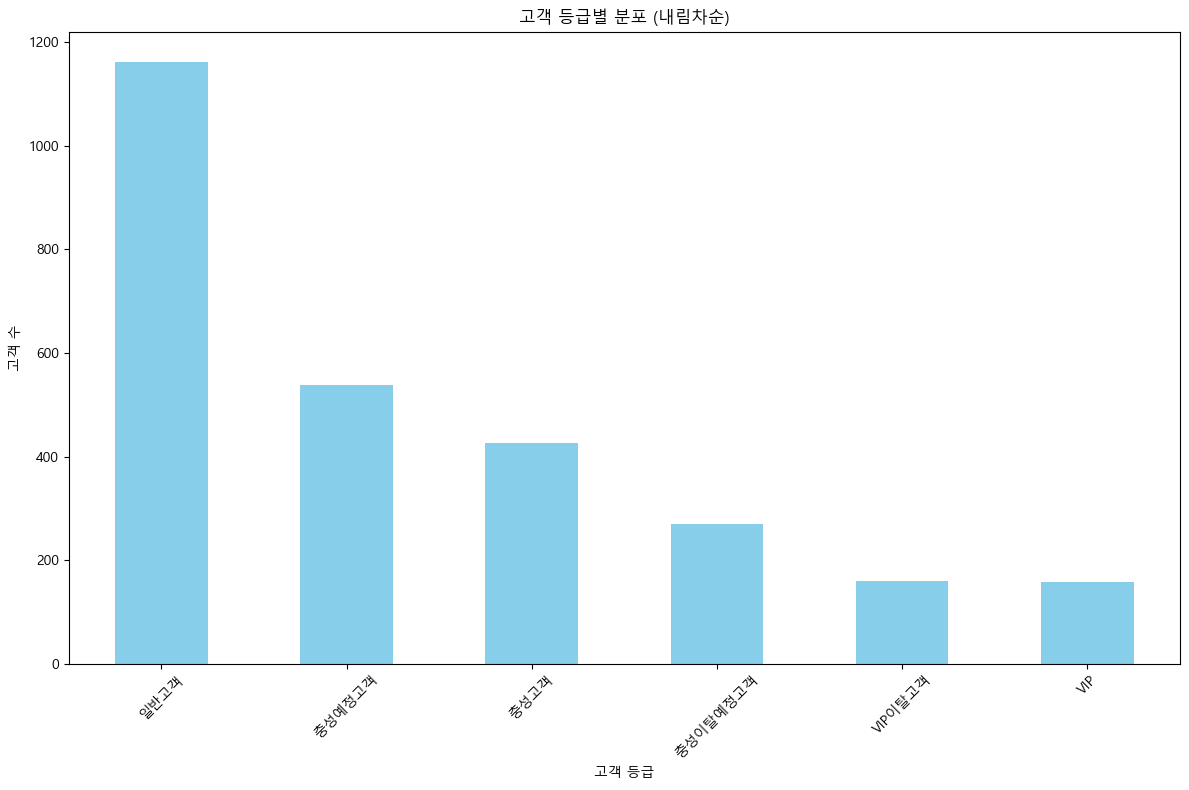

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

customer_grade_counts_desc = df_first_info['Membership'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
customer_grade_counts_desc.plot(kind='bar', color='skyblue')
plt.title('고객 등급별 분포 (내림차순)')
plt.xlabel('고객 등급')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
df_first_info.head()

,CustomerID,Recency,Monetary,Frequency,Length,R_Score,F_Score,M_Score,L_Score,RFML_Score,Membership
1,12347,21,1494.16,3,133,4,4,5,6,19,충성고객
2,12348,86,514.44,2,70,2,4,4,4,14,충성이탈예정고객
3,12350,148,294.40,1,0,1,1,3,1,6,일반고객
4,12352,100,521.18,8,34,2,6,4,4,16,충성이탈예정고객
5,12353,42,89.00,1,0,3,1,2,1,7,일반고객


In [26]:
df_first_info.groupby(['Membership']).agg({'CustomerID' : 'count', 'Recency' : 'mean', 'Monetary' : 'mean', 'Frequency' : 'mean', 'Length' : 'mean'} )

,CustomerID,Recency,Monetary,Frequency,Length
Membership,,,,,
VIP,159,8.899371,7507.824151,15.528302,158.188679
VIP이탈고객,160,21.112500,2704.513813,8.118750,126.218750
일반고객,1162,83.557659,334.098373,1.071429,0.308090
충성고객,427,12.562061,1074.099578,3.637002,97.135831
충성예정고객,538,43.215613,906.861489,2.964684,73.490706
충성이탈예정고객,270,101.529630,688.455815,2.651852,37.588889


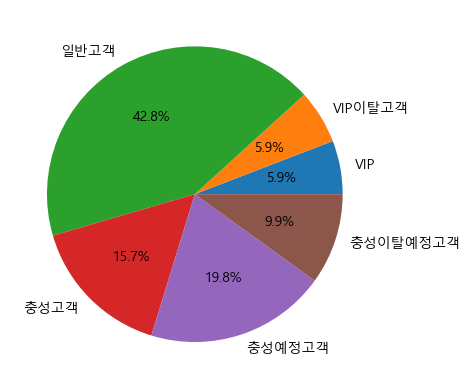

In [27]:
mem_gr = df_first_info.groupby(['Membership'])[['CustomerID']].count()
plt.pie(mem_gr['CustomerID'], labels=mem_gr.index, autopct = '%.1f%%');

### 각 등급별 R,F,M,L 평균값 시각화

In [28]:
def calculate_bills(param):
    mem_list = []
    total_list = []
    for i in df_first_info['Membership'].unique():
        mem_list.append(i)
        bills = df_first_info[df_first_info['Membership'] == i].groupby(['Membership'])[[param]].mean()
        total_list.append(bills.values[0][0])

    mem_df = pd.DataFrame({'Membership' : mem_list, param : total_list })
    return mem_df

Text(0.5, 1.0, 'Length')

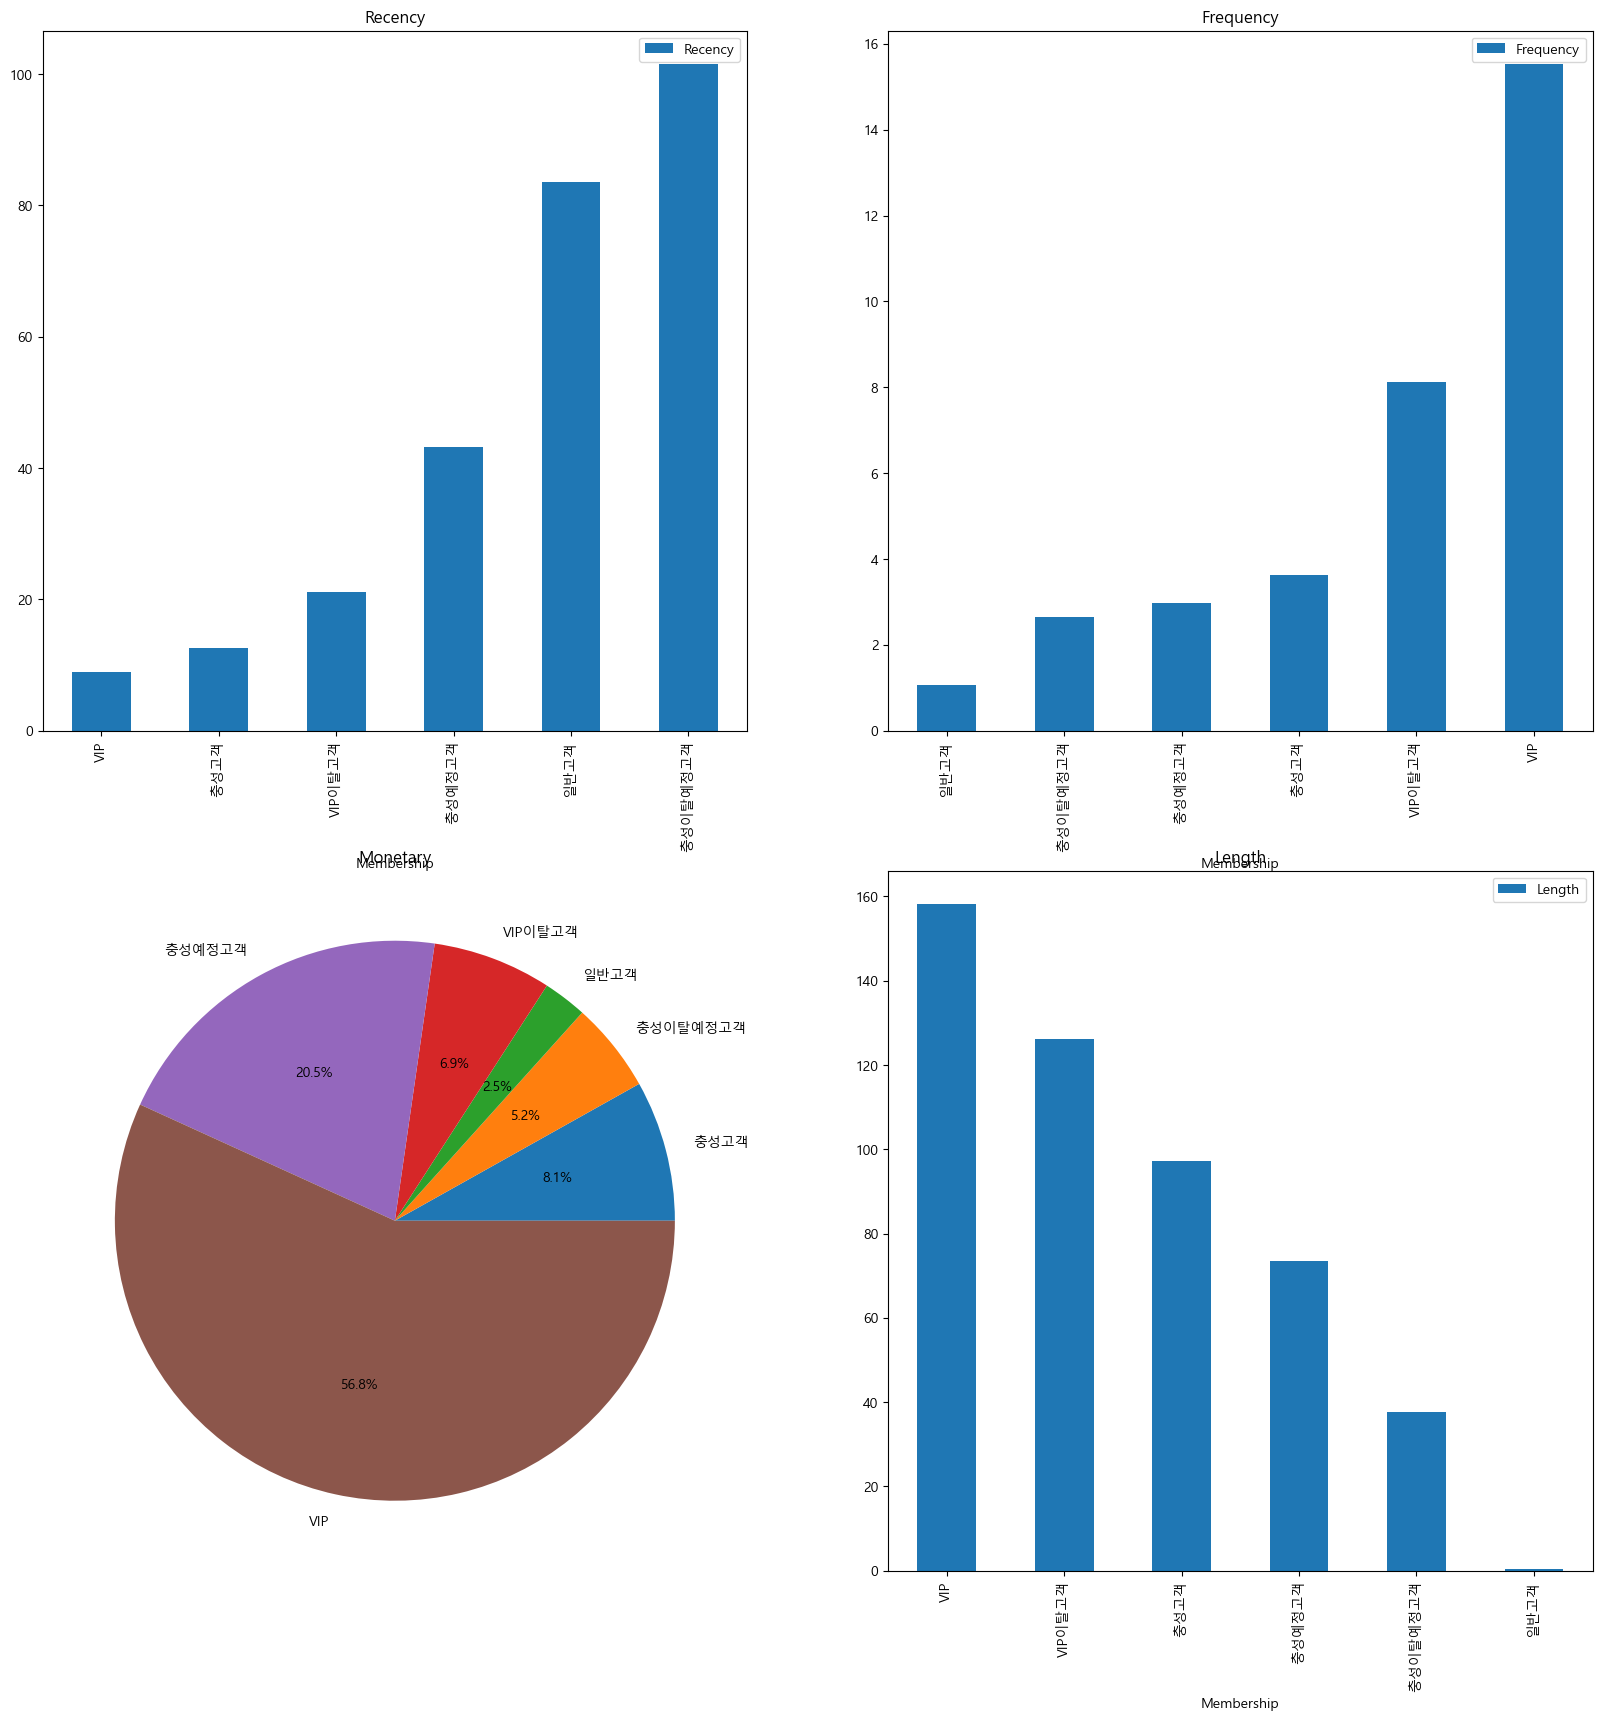

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
labels = ['충성고객', '충성이탈예정고객', '일반고객', 'VIP이탈고객','충성예정고객', 'VIP']
calculate_bills('Recency').sort_values(by='Recency', ascending=True).plot.bar(x='Membership', y='Recency', ax=ax[0, 0])
calculate_bills('Frequency').sort_values(by='Frequency', ascending=True).plot.bar(x='Membership', y='Frequency', ax=ax[0, 1])
ax[1, 0].pie(calculate_bills('Monetary')['Monetary'], labels=labels, autopct = '%.1f%%');
calculate_bills('Length').sort_values(by='Length', ascending=False).plot.bar(x='Membership', y='Length', ax=ax[1, 1])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Frequency')
ax[1, 0].set_title('Monetary')
ax[1, 1].set_title('Length')

### K-Means Clustering

- Feature Scaling 필요
- scikit-learn의 elbow method 알고리즘 활용하여 적절한 k값 도출
- k개 그룹별 R,F,M 기술통계량 계산
- RFM모형 가중치 선택 후 RFM_Score 계산

In [30]:
active_customer_ss = active_customer.drop(['CustomerID'], axis=1)
active_customer_ss.head()

,Recency,Monetary,Frequency,Length
1,21,1494.16,3,133
2,86,514.44,2,70
4,100,521.18,8,34
5,42,89.00,1,0
6,70,1079.40,1,0


<Axes: xlabel='Length', ylabel='Density'>

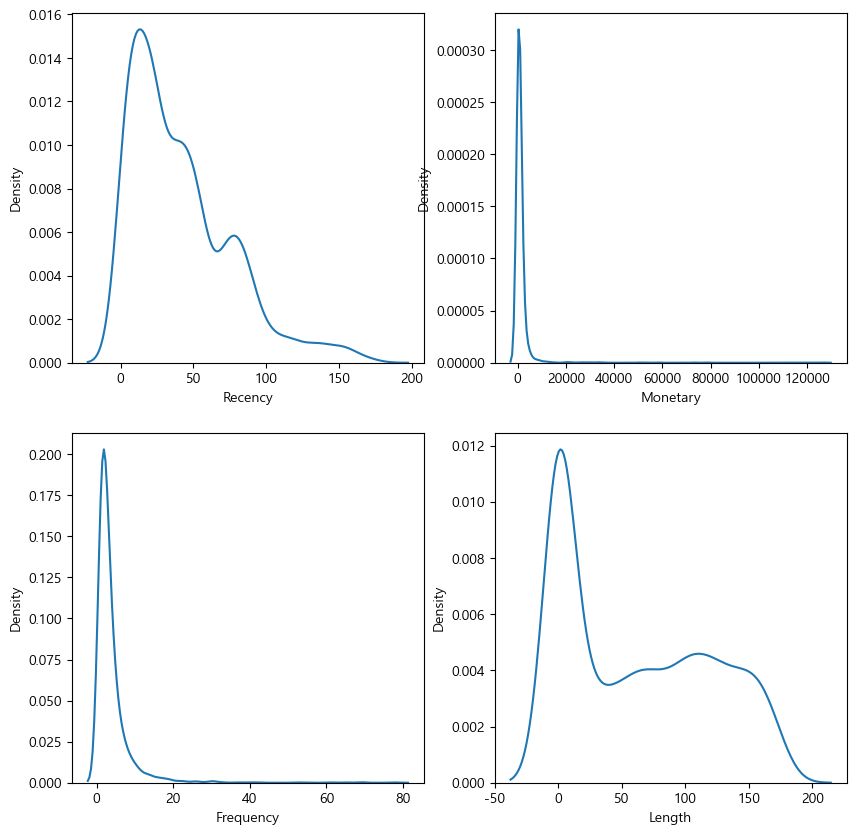

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(x='Recency', data=active_customer_ss, ax=ax[0, 0])
sns.kdeplot(x='Monetary', data=active_customer_ss, ax=ax[0, 1])
sns.kdeplot(x='Frequency', data=active_customer_ss, ax=ax[1, 0])
sns.kdeplot(x='Length', data=active_customer_ss, ax=ax[1, 1])

### elbow method 사용하여 최적의 k값 찾기

In [39]:
active_customer_ss

,Recency,Monetary,Frequency,Length,cluster
1,21,1494.16,3,133,0
2,86,514.44,2,70,1
4,100,521.18,8,34,1
5,42,89.00,1,0,2
6,70,1079.40,1,0,1
...,...,...,...,...,...
2744,78,73.70,2,25,1
2745,50,966.74,3,34,2
2749,18,80.82,1,0,2
2750,7,812.04,7,168,0


### MinMaxScaler

- MinMaxScaler로 각 컬럼의 범위를 0~1로 통일
- 실루엣 계수로 최적의 k개수 구하기

In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
X = MinMaxScaler().fit_transform(active_customer_ss)

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

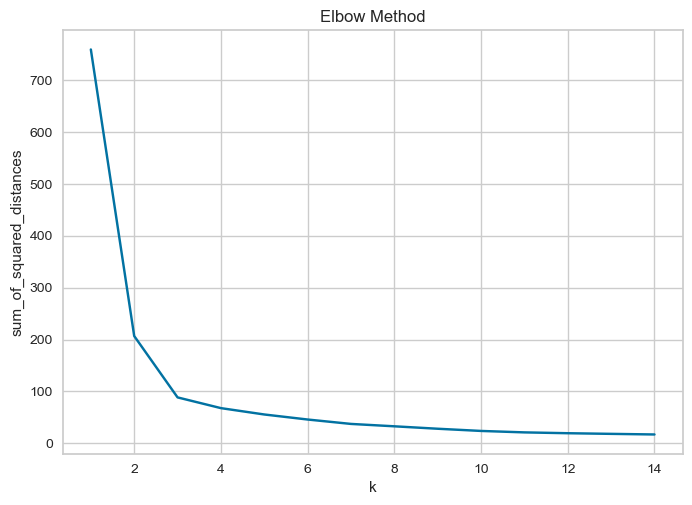

In [41]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

- Elbow Method : 군집의 개수를 정할 때, Elbow Method를 활용하여 군집을 늘려가면서 군집 내 변동성이 급감하는 군집 수를 찾음.
- 군집 내 변동성이 급감하였다는 것은 유사한 집단끼리 잘 묶였다는 의미

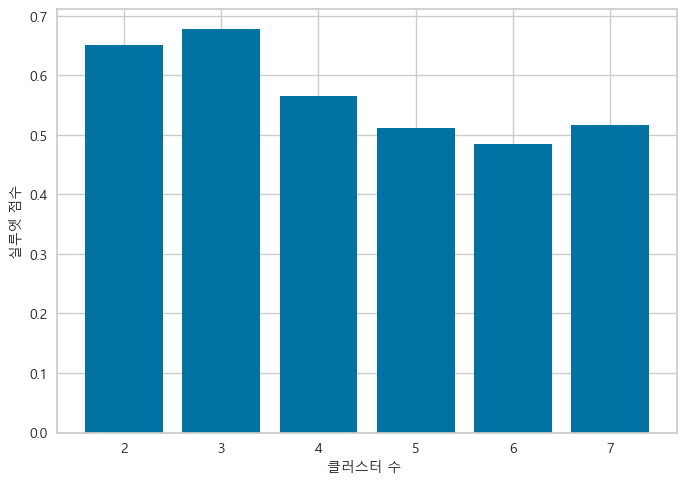

In [42]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from matplotlib import rc

rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False
get_ipython().run_line_magic("matplotlib","inline")

silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))
    )
k = [2, 3, 4, 5, 6, 7]
plt.bar(k, silhouette_scores)
plt.xlabel('클러스터 수 ', fontsize=10)
plt.ylabel('실루엣 점수', fontsize= 10)
plt.show()

- 군집화를 정량적으로 평가할 수 있는 방법 중 하나로 실루엣 계수가 있다.
- 실루엣 계수의 평균값이 1일에 가까울 수록 군집화가 잘 되었다고 할 수 있다.
- 0에 가까운 경우는 군집 간 거리가 좁다는 의미로, 군집화가 잘 이루어지지 않음을 의미
- https://studying-haeung.tistory.com/10
- k = 3일때 실루엣 계수가 가장 높다.

In [91]:
k_means = KMeans(n_clusters=3)
model = k_means.fit(X)
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.6775261681018604

In [93]:
kmeans_df = active_customer
kmeans_df['Cluster'] = labels
kmeans_df.set_index('CustomerID', drop=True,inplace=True)
kmeans_df.head()

,Recency,Monetary,Frequency,Length,Cluster
CustomerID,,,,,
12347,21,1494.16,3,133,2
12348,86,514.44,2,70,0
12352,100,521.18,8,34,0
12353,42,89.00,1,0,1
12354,70,1079.40,1,0,0


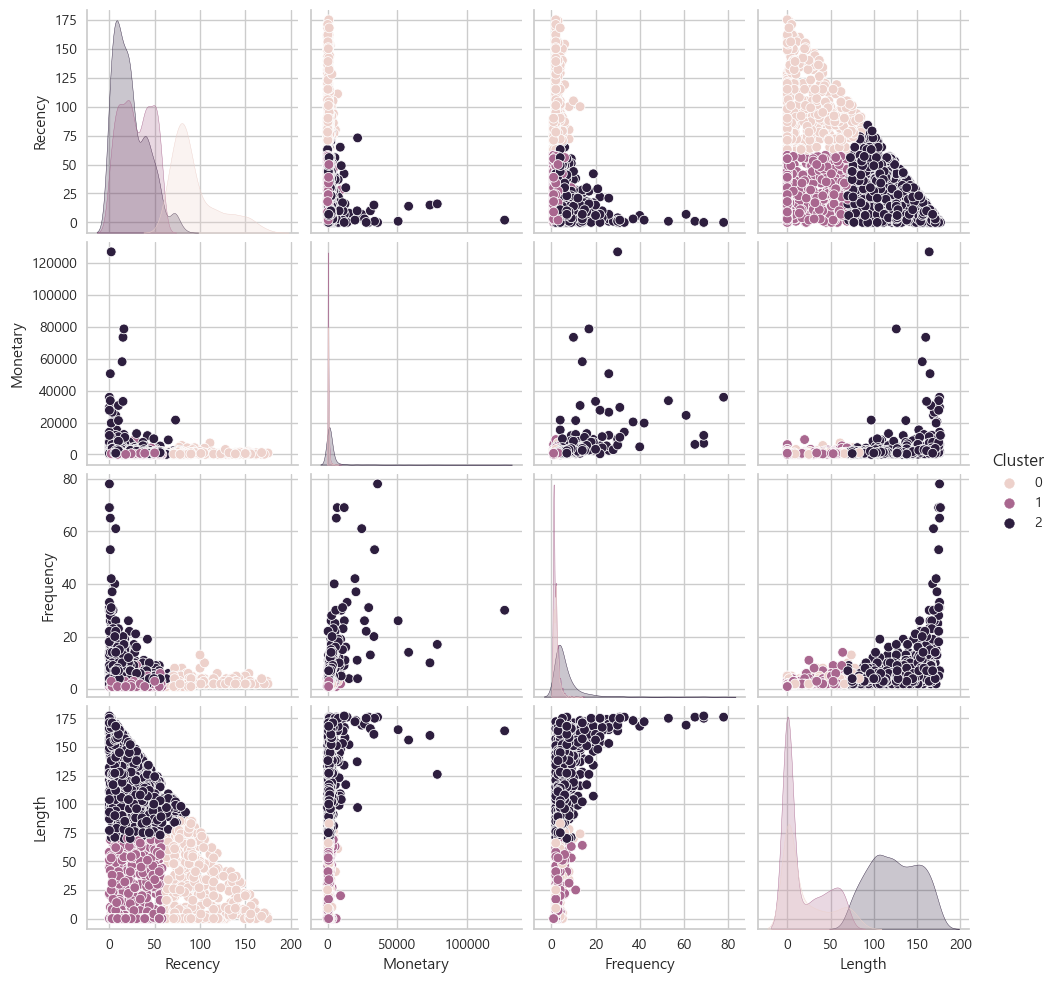

In [94]:
sns.pairplot(kmeans_df, hue='Cluster')

### 각 클러스터별 R,F, M, L 평균 수치 확인

In [45]:
table = kmeans_df.groupby('Cluster').agg({'Recency' : 'mean', 'Frequency' : 'mean', 'Monetary' : 'mean', 'Length' : 'mean'})
table['cluster분류'] = kmeans_df['Cluster'].value_counts()
table.head()

,Recency,Frequency,Monetary,Length,cluster분류
Cluster,,,,,
0,23.025137,6.412022,2486.341246,123.796721,915
1,29.257732,1.858247,545.003906,17.009021,776
2,93.618110,2.068898,555.743169,20.464567,508


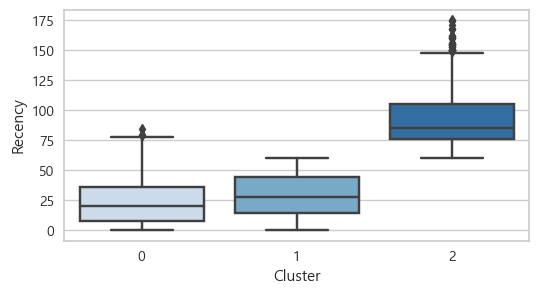

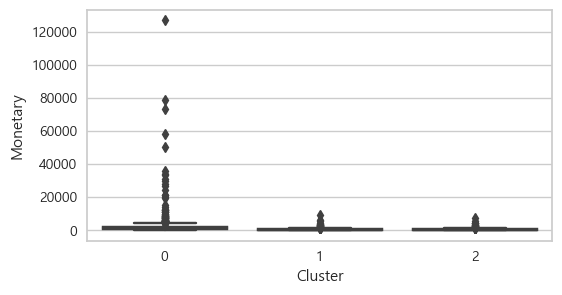

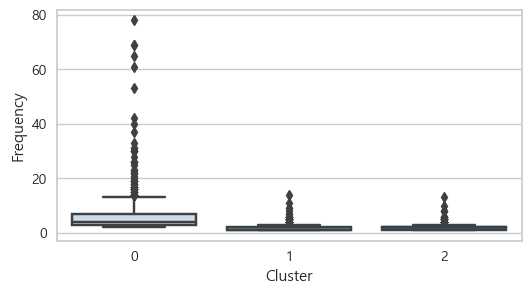

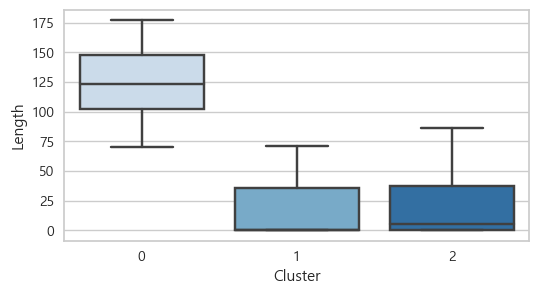

In [46]:
for i, c in enumerate(list(kmeans_df.columns[:-1])):
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=kmeans_df['Cluster'], y=kmeans_df[c], order = [0, 1, 2], palette='Blues')
    plt.show()   

### 최적의 하이퍼파라미터 찾기
- 랜덤 포레스트를 활용하여 각 집단에 영향을 미치는 주요한 변수를 탐색
- 변수의 중요성 수치에 따라 R, F, M, L 가중치를 부여하여 점수 계산하여 등급 재산정

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = MinMaxScaler().fit_transform(kmeans_df.drop('Cluster', axis=1))
y = kmeans_df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=13)

#탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt']
}

# gridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv=5, n_jobs = -1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best Parameters', grid_search.best_params_)

# 최적의 모델로 테스트 데이터 세트에 대한 성능 평가
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print(f'Test Set Accuracy : {test_accuracy:.4f}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Set Accuracy : 0.9985


### 최적 파라미터로 모델 학습 후 성능 평가

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_optimized = RandomForestClassifier(
    n_estimators = 100,
    max_depth = None,
    min_samples_leaf=1,
    min_samples_split=2,
    max_features='sqrt',
    random_state=0
)

#모델 학습
rf_optimized.fit(X_train, y_train)

#훈련 세트에 대한 성능 평가
y_train_pred = rf_optimized.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Set Accuracy: {train_accuracy:.4f}')

#테스트 세트에 대한 성능 평가
y_test_pred = rf_optimized.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {test_accuracy:.4f}')

Training Set Accuracy: 1.0000
Test Set Accuracy: 0.9985


### 시각화 및 가중치 측정

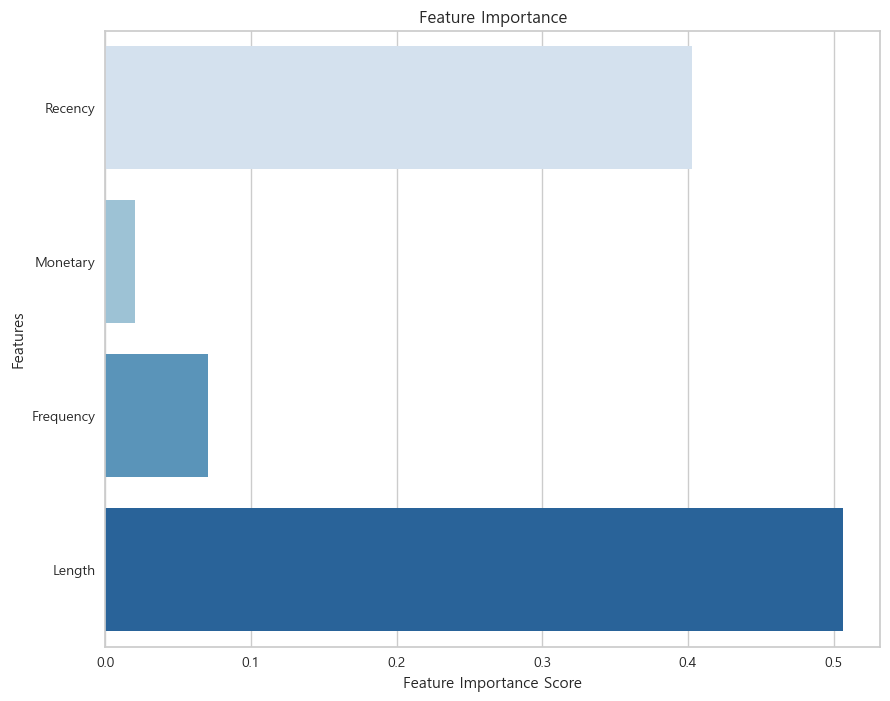

Recency : 0.4
Monetary : 0.02
Frequency : 0.07
Length : 0.51


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=rf_optimized.feature_importances_, y=kmeans_df.columns[:-1], palette='Blues')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

#가중치 계산
feature_importances = rf_optimized.feature_importances_
score = feature_importances / feature_importances.sum()

#각 특성의 가중치 출력
for feature, importance in zip(kmeans_df.columns[:-1], score):
    print(f'{feature} : {round(importance, 2)}')

### 가중치를 반영한 RFML 점수 계산

- RFML점수 : (0.4 * R_Score) + (0.07 * F_Score) + (0.02 * M_Score) + (0.51 * L_Score)

In [95]:
df_first_info['RFML'] = df_first_info['R_Score'] * score[0] + df_first_info['F_Score'] * score[2] + df_first_info['M_Score'] * score[1] + df_first_info['L_Score'] * score[3]
df_first_info['RFML'].describe()

count    2716.000000
mean        3.156321
std         1.483267
min         1.000000
25%         1.825291
50%         3.265399
75%         4.285612
max         6.000000
Name: RFML, dtype: float64

- 점수에 따라 등급 산정 (basic, bronze, silver, gold, VIP, VVIP)

In [96]:
def segment(row):
    if row <= 1.5:
        return 'basic'
    elif row <= 2:
        return 'bronze'
    elif row <= 3:
        return 'silver'
    elif row <= 4:
        return 'gold'
    elif row <= 5:
        return 'VIP'
    else:
        return 'VVIP'

In [97]:
df_first_info['가중치고객등급'] = df_first_info['RFML'].apply(segment)

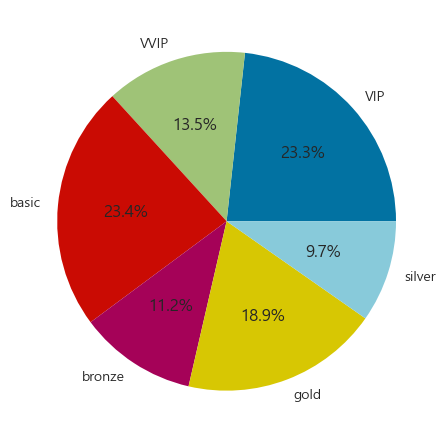

In [98]:
grade_count = df_first_info.groupby(['가중치고객등급'])[['CustomerID']].count()
labels = grade_count.index
plt.pie(grade_count['CustomerID'], labels=labels, autopct='%.1f%%');

In [99]:
grade_monetary = df_first_info.groupby(['가중치고객등급'])['Monetary'].sum().sort_values() / df_first_info['Monetary'].sum() * 100

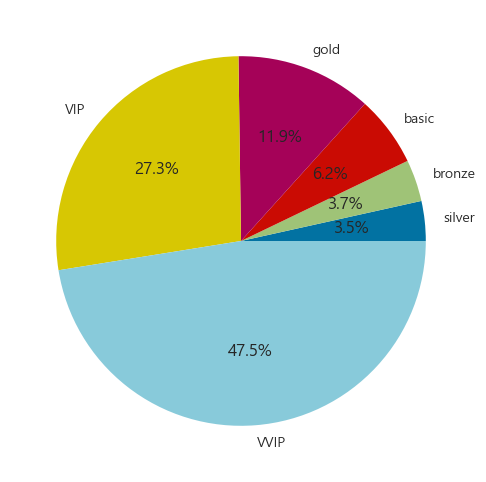

In [100]:
labels = grade_monetary.index
sizes = grade_monetary.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct = '%.1f%%');

In [104]:
df_first_info['Membership']

1           충성고객
2       충성이탈예정고객
3           일반고객
4       충성이탈예정고객
5           일반고객
          ...   
2746        일반고객
2748        일반고객
2749        일반고객
2750     VIP이탈고객
2751        일반고객
Name: Membership, Length: 2716, dtype: object

In [106]:
df_first_info

,CustomerID,Recency,Monetary,Frequency,Length,R_Score,F_Score,M_Score,L_Score,RFML_Score,Membership,RFML,가중치고객등급
1,12347,21,1494.16,3,133,4,4,5,6,19,충성고객,5.033754,VVIP
2,12348,86,514.44,2,70,2,4,4,4,14,충성이탈예정고객,3.194922,gold
3,12350,148,294.40,1,0,1,1,3,1,6,일반고객,1.040425,basic
4,12352,100,521.18,8,34,2,6,4,4,16,충성이탈예정고객,3.335877,gold
5,12353,42,89.00,1,0,3,1,2,1,7,일반고객,1.825291,bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,18273,95,51.00,1,0,2,1,1,1,5,일반고객,1.402539,basic
2748,18280,115,180.60,1,0,2,1,3,1,7,일반고객,1.442964,basic
2749,18281,18,80.82,1,0,4,1,2,1,8,일반고객,2.227830,silver
2750,18283,7,812.04,7,168,5,6,5,6,22,VIP이탈고객,5.577248,VVIP


In [108]:
combined_data = pd.merge(df_first, df_first_info[['CustomerID', 'Membership', '가중치고객등급']], on='CustomerID', how='inner')
combined_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,Membership,가중치고객등급
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,2011-01-01,1.95,13313,United Kingdom,19.50,Completed,충성예정고객,VIP
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,2011-01-01,0.42,13313,United Kingdom,10.50,Completed,충성예정고객,VIP
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,2011-01-01,0.42,13313,United Kingdom,10.50,Completed,충성예정고객,VIP
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2011-01-01,2.10,13313,United Kingdom,10.50,Completed,충성예정고객,VIP
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,2011-01-01,1.25,13313,United Kingdom,12.50,Completed,충성예정고객,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147786,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30 20:08:00,2011-06-01,0.42,17891,United Kingdom,5.04,Completed,일반고객,gold
147787,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30 20:08:00,2011-06-01,0.42,17891,United Kingdom,5.04,Completed,일반고객,gold
147788,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30 20:08:00,2011-06-01,0.42,17891,United Kingdom,5.04,Completed,일반고객,gold
147789,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30 20:08:00,2011-06-01,0.42,17891,United Kingdom,5.04,Completed,일반고객,gold


In [110]:
combined_data.groupby(['Membership', '가중치고객등급'])[['CustomerID']].nunique()

CustomerID
Membership 가중치고객등급            
VIP        VVIP            159
VIP이탈고객    VIP              87
           VVIP             73
일반고객       VIP               3
           basic           635
           bronze          305
           gold             20
           silver          199
충성고객       VIP             249
           VVIP            134
           gold             44
충성예정고객     VIP             286
           VVIP              1
           gold            251
충성이탈예정고객   VIP               7
           gold            198
           silver           65